#### Objetivo

O objetivo deste projeto é estudar o processamento de linguagem natural. A idéia é analisar um dataset de reviews de usuários do site IMDB para todos os filmes da franquia do Homem Aranha.


O dataset escolhido para o estudo foi retirado do site kaggle: https://www.kaggle.com/datasets/okancan/spiderman-movies-imdb-reviews, que foi disponibilizado no site a cerca de 2 anos atrás e contém o review de 9 filmes do personagem.

#### Biblioteca de NLP escolhida: VADER (Valence Aware Dictionary and sEntiment Reasoner)

Esta é uma biblioteca de análise de sentimentos em textos que atribui pontuações as palavras individuais, frases ou documentos inteiros com base em um dicionário de palavras e regras gramaticais. Ela foi constrúida para textos em inglês, e apesar de existirem adaptações para o português, aqui neste projeto iramos analisar um texto em inglês com o uso oficial da biblioteca, sem adaptações.

Pontuação VADER:

1. Compound Score: É uma pontuação composta que varia de -1 a +1, onde valores negativos indicam sentimentos negativos, valores positivos indicam sentimentos positivos e valores próximos a zero indicam neutralidade. 

O compound score é uma média das pontuações de sentimentos de todas as palavras no texto, ajustado pela intensidade das palavras e sua polaridade.

2. Positive (Pos) Score: Representa a proporção de palavras no texto que são classificadas como positivas em relação ao total de palavras. Quanto maior o valor, mais positivo é o sentimento expresso no texto.

3. Negative (Neg) Score: Representa a proporção de palavras no texto que são classificadas como negativas em relação ao total de palavras. Quanto maior o valor, mais negativo é o sentimento expresso no texto.

4. Neutral (Neu) Score: Representa a proporção de palavras no texto que são classificadas como neutras em relação ao total de palavras. Esse valor indica o quão neutro é o sentimento expresso no texto.



##### Importe das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\021042631\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\021042631\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Análise inicial do dataframe

In [2]:
df_kaggle = pd.read_csv('data_source/imdb-spider-man-reviews.csv')
df_kaggle.shape

(21228, 7)

In [3]:
df_kaggle.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


In [4]:
df_kaggle.isnull().sum()

Rating          1162
Title              0
Date               0
Helpful_Vote       0
Total_Vote         0
Review             0
Movie              0
dtype: int64

In [5]:
df_kaggle.dtypes

Rating          float64
Title            object
Date             object
Helpful_Vote      int64
Total_Vote        int64
Review           object
Movie            object
dtype: object

In [6]:
df_reviews = df_kaggle.copy()
df_reviews = df_reviews.dropna(subset=['Rating'])
df_reviews.shape

(20066, 7)

In [7]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse


##### Análise de sentimentos com biblioteca Vader, usando 'compound'

In [8]:
# Intancia
analyser = SentimentIntensityAnalyzer()

In [9]:
# função para processamento da análise
def compound_analysis(text):
    df_analyzed = analyser.polarity_scores(text)['compound']
    return df_analyzed

In [10]:
# executando o processamento
df_reviews['compound_analysis'] = df_reviews['Review'].apply(compound_analysis)
df_reviews.shape

(20066, 8)

In [11]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709


In [12]:
#  -1 = muito negativa +1 / +1 = review muito positiva
df_reviews['compound_analysis']

0       -0.4515
1        0.9866
2        0.9727
3        0.7615
4        0.9709
          ...  
21223    0.9499
21224    0.9985
21225    0.9042
21226    0.9077
21227    0.9957
Name: compound_analysis, Length: 20066, dtype: float64

##### Analise da coluna de Rating e conversão para intervalos de -1 a 1

In [13]:
df_reviews['Rating'].unique()

array([10.,  8.,  7.,  6.,  9.,  5.,  2.,  4.,  1.,  3.])

In [14]:
print(type (df_reviews['Rating'][0]))

<class 'numpy.float64'>


In [15]:
print(type (df_reviews['compound_analysis'][0]))

<class 'numpy.float64'>


In [16]:
def convert_to_minus_one_plus_one(x):
    if x == 1:
        return -1
    elif x == 10:
        return 1
    else:
        return round((x - 5) / 4.5, 4)

In [17]:
df_reviews['convert_Rating'] = df_reviews['Rating'].apply(convert_to_minus_one_plus_one)
df_reviews.shape

(20066, 9)

In [18]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000


Verificando as correspôndencias entre Rating IMDB e convert_Rating: 

O site do IMDB não determina uma faixa para classificar os reviews em positivos, negativos ou neutros. O rating final do filme é calculado atráves da média de todos os reviews recebidos dos usuários, que podem votar numa escala de 1 a 10 que é representada por estrelas. Em geral, o publico considera ratings maiores ou iguais a 7 como notas mais positivas, mas esta não é uma regra estabelecida no site.

Como não há um divisão oficial do range de notas para os 4 sentimentos, em nossa análise vamos dividir os sentimentos em negativo, neutro e positivo, iremos estabelecer a seguinte escala para classificar os reviews:

df_reviews['Rating'] <= 4: negativo

df_reviews['Rating'] >= 5 e <= 6: neutro

df_reviews['Rating'] >= 7: positivo

In [19]:
df_reviews4 = df_reviews[df_reviews.Rating == 4]
df_reviews4.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
59,4.0,WTF?,22 February 2019,19,39,Have you ever wondered what if the Yes-man was...,Spider-Man: Into the Spider-Verse,-0.9274,-0.2222


In [20]:
df_reviews5 = df_reviews[df_reviews.Rating == 5]
df_reviews5.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
19,5.0,"Despite the animation, still pretty much your ...",7 October 2019,27,54,Miles Morales has just started at a new school...,Spider-Man: Into the Spider-Verse,0.7493,0.0


In [21]:
df_reviews6 = df_reviews[df_reviews.Rating == 6]
df_reviews6.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
13,6.0,Visually Beautiful but the Good Part of the St...,15 March 2019,62,116,It started of well and I knew by the trailer w...,Spider-Man: Into the Spider-Verse,0.9967,0.2222


In [22]:
df_reviews7 = df_reviews[df_reviews.Rating == 7]
df_reviews7.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
10,7.0,"Visually innovative, but has a lack of focus a...",4 January 2019,157,274,As much as I enjoy this movie (and as an anima...,Spider-Man: Into the Spider-Verse,0.9988,0.4444


##### Definindo valores categóricos positivo, negativo, neutro e medindo a acurácia

Na coluna compound_analysis e convert_Rating, estes serão os valores de referência:

* Rating 4 corresponde a: -0.2222

* Rating 5 corresponde a: 0 (zero)

* Rating 6 corresponde a: 0.2222

* Rating 7 corresponde a: 0.4444

Intervalos finais para conversão:

* -1 <= value < -0.21: negativo

* -0,21 <= value < +0,44: neutro

* +0,44 <= value <= +1: positivo

In [23]:
# converter compound em sentimento
def categorical_sentiment(compound_analysis):
    if compound_analysis >= 0.44:
        return 'positive'
    elif compound_analysis < -0.21:
        return 'negative'
    else:  
        return 'neutral'

In [24]:
df_reviews.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0


In [25]:
df_reviews['compound_sentiment'] = df_reviews['compound_analysis'].apply(categorical_sentiment)
df_reviews.shape

(20066, 10)

In [26]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive


Converter coluna 'convert_Rating' em sentimento categórico

In [27]:
df_reviews['rating_sentiment'] = df_reviews['convert_Rating'].apply(categorical_sentiment)
df_reviews.shape

(20066, 11)

In [28]:
df_reviews.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive,positive
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive,positive
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive,positive


##### Cálculo da Acurácia

Será comparado as classificações categóricas entre o rating oficial IMDB e o sentimento calculado

O que é Acurácia?

É uma medida estatística que avalia a precisão de um modelo ou método de classificação. Ela mede a proporção de previsões corretas feitas por um modelo em relação ao total de previsões feitas. Em cenários de classificação ela indica a porcentagem de casos que o modelo classificou corretamente os dados. Quando mais próxima de 1, melhor o desempenho do modelo.

In [29]:
accuracy = accuracy_score(df_reviews['rating_sentiment'], df_reviews['compound_sentiment'])
print('A acurácia do modelo foi de: ', round(accuracy, 2))

A acurácia do modelo foi de:  0.72


Análise Gráfica: Comparativo rating_sentiment x compound_sentiment

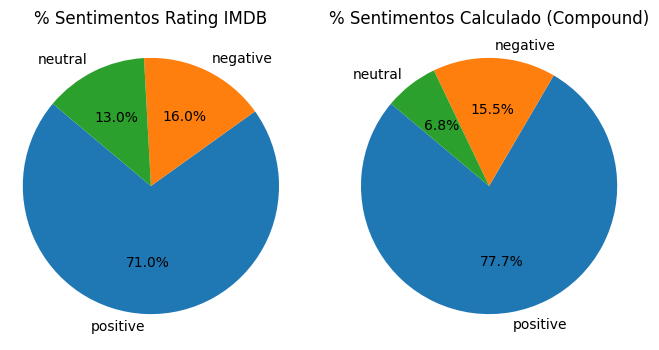

In [30]:
rating_sentiment_counts = df_reviews['rating_sentiment'].value_counts()
compound_sentiment_counts = df_reviews['compound_sentiment'].value_counts()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.pie(rating_sentiment_counts, labels=rating_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Rating IMDB')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(compound_sentiment_counts, labels=compound_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Calculado (Compound)')
plt.axis('equal')

plt.show()

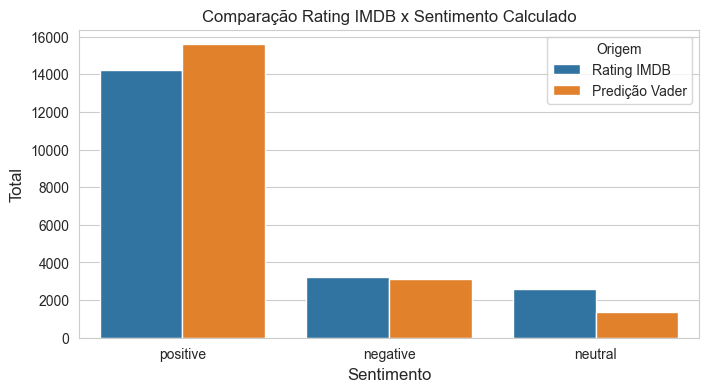

In [31]:
sentiment_counts_df = pd.DataFrame({
    'Sentimento': ['positive', 'negative', 'neutral'],
    'Rating IMDB': df_reviews['rating_sentiment'].value_counts(),
    'Predição Vader': df_reviews['compound_sentiment'].value_counts()
}).fillna(0)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='Sentimento', y='value', hue='variable', data=pd.melt(sentiment_counts_df, ['Sentimento']))

plt.title('Comparação Rating IMDB x Sentimento Calculado', fontsize=12)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Origem', fontsize=10)

plt.show()

Aqui podemos ver que o modelo apresentou maior erro em relação ao Rating oficial IMDB para classificar reviews neutros, onde as notas ficaram entre 5 e 6 (-0,21 <= value < +0,44: neutro)

##### Tratamento do texto e visualização em gráficos de Nuvem de Palavras

In [32]:
df_reviews.head(1)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0,negative,positive


Verificando e stopwords:

In [33]:
stopwords_en[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
len(stopwords_en)

179

In [35]:
def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_en]

    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

Análise de palavras muito comuns no contexto do filme e que podem aparecer tanto num review positivo quanto negativo, como nome do filme, nome dos personagens e etc.

In [36]:
# juntar todos os textos de review numa unica variável
text_reviews = ' '.join(df_reviews['Review'])

In [37]:
# separar as palavras
all_words = text_reviews.split()
len(all_words)

3813757

Análise da ocorrência de palavras mais comuns:

In [38]:
common_words = ['spider','movie', 'film', 'character', 'peter', 'parker']
len(common_words)

6

In [39]:
most_common = [word for word in all_words if 'spider' in word.lower()]
len(most_common)

49442

In [40]:
unique_common_word = set(most_common)
len(unique_common_word)

1597

In [41]:
unique_common_word

{'Spider—Man—while',
 'spider(MAN)and',
 'spider-senses,',
 'Spider-man?"',
 'spider-man)lacks',
 'Spider-boy?).',
 'SpiderMan/any',
 "Spider-man's",
 'spider-sense.',
 'Spider-Boy.',
 '"Spider-Man"(2002).',
 'Spider-Woman)',
 'Spider-Man.Animation',
 'Spider".',
 '_Spiderman',
 'SPIDERMAN*',
 'Spider_Men',
 'spidermen.The',
 'spidery',
 'Porker/Spider-Ham,',
 '"Spider-Men',
 'spider-man-man',
 'spider-man!',
 '"Spider-man"',
 "'spidermen'",
 'Spiderheroes',
 'of...Spider-Man',
 '_Spider-man',
 "Spider-Man'",
 'Spider-Man".',
 'Spider-Fans,',
 '"SPIDER-MAN".',
 'Spider-Man:Homecoming',
 'Parker/Spider-man.',
 'Spiderperve',
 'Peter/Spiderman.',
 'spider-man?',
 'Deadpool/Spiderman',
 'Spiderman...and',
 '"Spiderverse"',
 "Spider-Man/2'",
 'spider-characaters',
 "Spider-Woman's",
 'half-spider',
 'spiderman"',
 '(Spider-Man',
 'SpiderMAN.',
 'Spider-Man."?',
 "Spider-Verse's",
 'spidermans/villains',
 '#Spider-ManNoWayHOME',
 'Spiderfilm',
 'one.Spider',
 'http://escapepod.org/2007/05/1

Como há muitas variáções da palavra spider, não é viável removê-las com o mesmo método usado para as stopwords, por isso vamos criar uma nova função que irá eliminar todas as palavras que contém a palavra alvo. Por exemplo, se for encontrado uma palavras 'spider', 'spider-man' ou "Parker/Spider-man's", todas serão excluídas.


Utilizados a palavra 'spider' para análise do cénario, mas todas as palavras 'comuns' vão receber o mesmo tratamento.

In [42]:
def remove_common_words(text, common_list):

    all_words = text.split()

    cleaned_words = []

    for word in all_words:
        if not any(common_word.lower() in word.lower() for common_word in common_list):
            cleaned_words.append(word)

    
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [43]:
cleaned_all_reviews = remove_common_words(text_reviews, common_words)

In [44]:
cleaned_list_words = cleaned_all_reviews.split()
len(cleaned_list_words)

3636159

In [45]:
cleaned_list_words

['Into',
 'the',
 'is',
 'a',
 'fantastic',
 'but',
 'might',
 'be',
 'a',
 'bit',
 'overwhelming',
 'for',
 'some',
 'viewers.',
 "It's",
 'filled',
 'with',
 'blaring',
 'hip-hop',
 'music',
 'and',
 'the',
 'animation',
 'is',
 'beyond',
 "splashy...it's",
 'competely',
 'intense!',
 'Now',
 'these',
 'are',
 'NOT',
 'criticisms...more',
 'a',
 'warning',
 'if',
 'you',
 'hate',
 'these',
 'sorts',
 'of',
 'things',
 'or',
 'if',
 'you',
 'or',
 'someone',
 'you',
 'loves',
 'has',
 'challenges,',
 'such',
 'as',
 'Autism....as',
 'the',
 'might',
 'really',
 'be',
 'overwhelming.',
 'Still,',
 "I'm",
 'nearly',
 '55',
 'and',
 'loved',
 'the',
 'picture...and',
 'I',
 'think',
 'most',
 'will',
 'if',
 'they',
 'have',
 'an',
 'open',
 'mind',
 'and',
 'want',
 'something',
 'different.',
 'That',
 'DOES',
 'strongly',
 'apply',
 'to',
 'me,',
 'as',
 "I've",
 'gotten',
 'sick',
 'of',
 'superhero',
 'because',
 'there',
 'have',
 'been',
 'so',
 'many',
 'recently',
 'and',
 "ther

In [46]:
# verificando se todas as palavras que contém 'spider' foram eliminadas
most_common_spider= [word for word in cleaned_list_words if 'spider' in word.lower()]
len(most_common_spider)

0

Gerando nuvens de palavras geral, de todos os reviews, para verificar visualmente se as palavras mais comuns foram excluídas:

In [47]:
all_reviews_cleaned = ' '.join(cleaned_list_words)

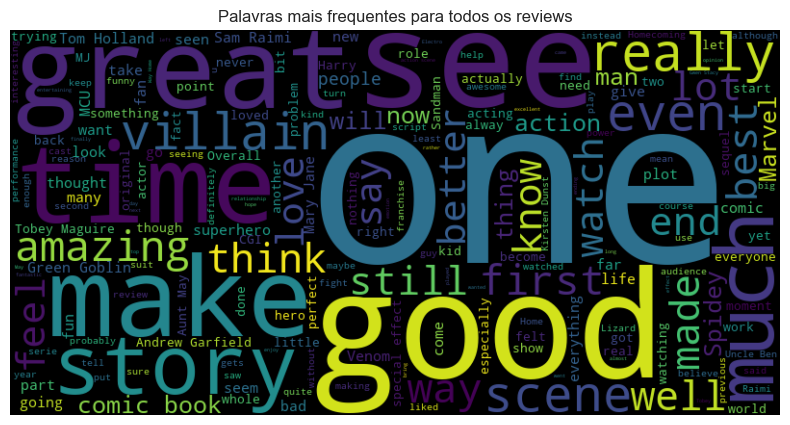

In [48]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_reviews_cleaned)  
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Palavras mais frequentes para todos os reviews')
plt.axis('off')
plt.show()

Gerar um gráfico para cada tipo: positive, negative e neutral

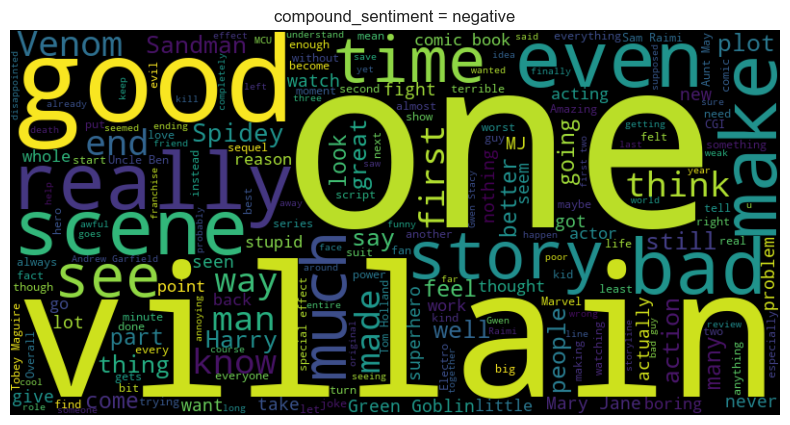

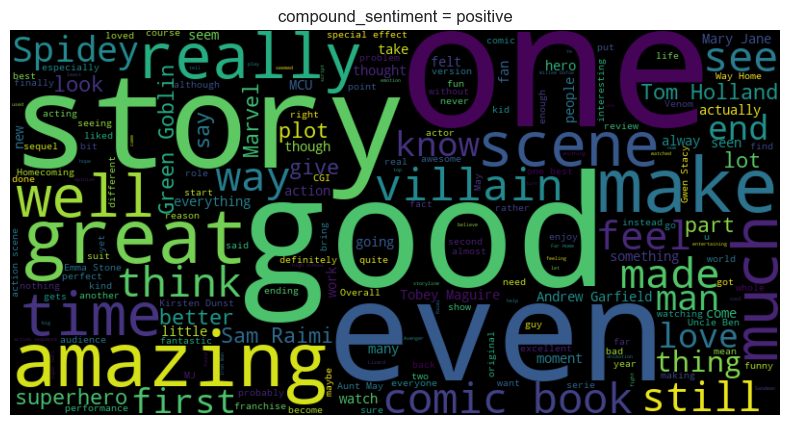

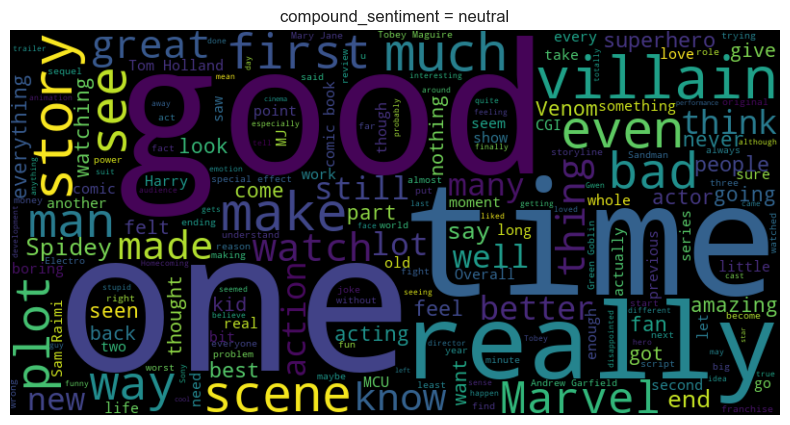

In [49]:
for sentiment_value in df_reviews['compound_sentiment'].unique():

    filtered_df = df_reviews[df_reviews['compound_sentiment'] == sentiment_value]
    
    text_reviews = ' '.join(filtered_df['Review'])

    cleaned_stop_words = remove_stopwords(text_reviews)
    cleaned_reviews = remove_common_words(cleaned_stop_words, common_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(cleaned_reviews)  


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'compound_sentiment = {sentiment_value}')
    plt.axis('off')
    plt.show()

##### Análise de sentimentos com biblioteca Vader, usando 'pos', 'neg', 'neu'

In [50]:
df_reviews_new = df_reviews.copy()
df_reviews_new.shape

(20066, 11)

In [51]:
df_reviews_new.head(2)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive


In [52]:
def analyze_sentiment(text, type):
    """
    text (str): O texto a ser analisado.
    type (str): O tipo do sentimento desejado ('pos', 'neg' ou 'neu').
    """
    df_analyzed = analyser.polarity_scores(text)
    
    return df_analyzed[type]

In [53]:
df_reviews_new['pos_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'pos'))
df_reviews_new.shape

(20066, 12)

In [54]:
df_reviews_new['neg_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'neg'))
df_reviews_new.shape

(20066, 13)

In [55]:
df_reviews_new['neu_analysis'] = df_reviews_new['Review'].apply(lambda text: analyze_sentiment(text, 'neu'))
df_reviews_new.shape

(20066, 14)

In [56]:
df_reviews_new.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment,pos_analysis,neg_analysis,neu_analysis
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive,0.134,0.126,0.740
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive,0.143,0.013,0.845
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive,positive,0.308,0.063,0.629
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive,positive,0.148,0.083,0.769
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive,positive,0.145,0.018,0.837


Criar uma coluna que vai classificar positive, negative ou neutral, olhando para as 3 colunas pos, neg, neu, e atribuindo de acordo com o maior valor entre elas:

In [57]:
select_sentiment = {
    'pos_analysis': 'positive',
    'neg_analysis': 'negative',
    'neu_analysis': 'neutral'
}

df_reviews_new['final_sentiment_analysis'] = df_reviews_new[['pos_analysis', 'neg_analysis', 'neu_analysis']].idxmax(axis=1).map(select_sentiment)


In [58]:
df_reviews_new.head(5)

,Rating,Title,Date,Helpful_Vote,Total_Vote,Review,Movie,compound_analysis,convert_Rating,compound_sentiment,rating_sentiment,pos_analysis,neg_analysis,neu_analysis,final_sentiment_analysis
0,10.0,Fantastic...but possibly overwhelming.,26 March 2019,54,71,"""Spider-Man: Into the Spider-Verse"" is a fanta...",Spider-Man: Into the Spider-Verse,-0.4515,1.0000,negative,positive,0.134,0.126,0.740,neutral
1,8.0,How on God's green Earth did this work so well???,21 December 2018,198,279,The worlds of superhero movies and superhero c...,Spider-Man: Into the Spider-Verse,0.9866,0.6667,positive,positive,0.143,0.013,0.845,neutral
2,10.0,Stan Lee Is Smiling Right Now,17 December 2018,773,947,A movie worthy of Stan Lee's approval. Incredi...,Spider-Man: Into the Spider-Verse,0.9727,1.0000,positive,positive,0.308,0.063,0.629,neutral
3,10.0,So Much More Than I Expected!,19 November 2019,38,50,"So many have commented, so I will be brief. Fr...",Spider-Man: Into the Spider-Verse,0.7615,1.0000,positive,positive,0.148,0.083,0.769,neutral
4,10.0,Game Changer,21 December 2018,373,517,Have you ever sat through a film and you knew ...,Spider-Man: Into the Spider-Verse,0.9709,1.0000,positive,positive,0.145,0.018,0.837,neutral


Comparando a classificação oficial via IMDB, o cálculo compound e pos, neg, neu da biblioteca Vader:

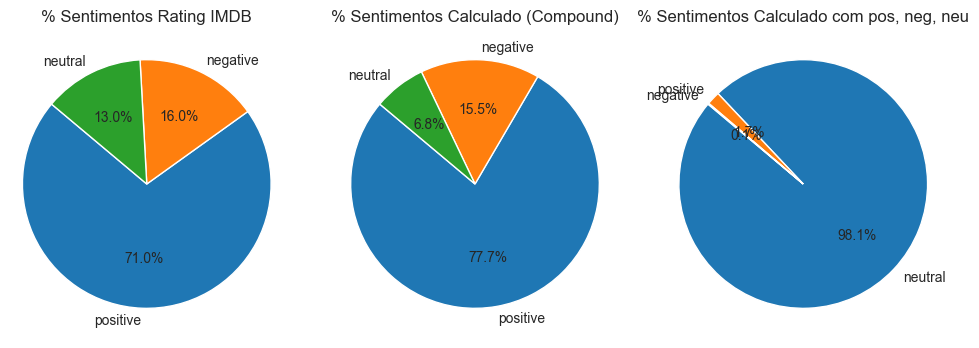

In [59]:
rating_sentiment_counts = df_reviews_new['rating_sentiment'].value_counts()
compound_sentiment_counts = df_reviews_new['compound_sentiment'].value_counts()
final_sentiment_analysis_counts = df_reviews_new['final_sentiment_analysis'].value_counts()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.pie(rating_sentiment_counts, labels=rating_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Rating IMDB')
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.pie(compound_sentiment_counts, labels=compound_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Calculado (Compound)')
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.pie(final_sentiment_analysis_counts, labels=final_sentiment_analysis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('% Sentimentos Calculado com pos, neg, neu')
plt.axis('equal')

plt.show()

Podemos verificar que usar o maior valor entre os 3 (pos, neg, neu) não traz melhor resultado em relação ao uso do método de classificação 'compound', pois como verificado, todos os review possuiem palavras neutras como maioria, porém isto nao quer dizer que o review foi neutro, dado que nesta aboardagem é olhado apenas a proporção de palavras no texto que são classificadas como positivas, negativas ou neutras, sem atribuir um peso maior a nenhuma categoria. A titulo de exemplo numérico, um review pode ter 20 palavras, com somente 5 palavras negativas e ainda sim ser um review negativo, e não neutro (mesmo com 75% das palavras como neutras).

##### Fontes de consulta:

https://www.imdb.com/

https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=ttrt_wtavg#

https://afontedeinformacao.com/biblioteca/artigo/read/87175-como-funciona-a-classificacao-do-imdb

https://www.nltk.org/_modules/nltk/sentiment/vader.html

https://www.kaggle.com/datasets/okancan/spiderman-movies-imdb-reviews/data